<a href="https://colab.research.google.com/github/raphaelp-silva/GNN_Pytorch_geometric/blob/main/GNN_obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
import kagglehub

# Fazendo o download da ultima versão via api
path = kagglehub.dataset_download("adeniranstephen/obesity-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 32.7k/32.7k [00:00<00:00, 20.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/adeniranstephen/obesity-prediction-dataset/versions/1


In [4]:
os.listdir(path) #listando os arquivos do diretorio

['ObesityDataSet_raw_and_data_sinthetic.csv']

In [5]:
db = pd.read_csv(os.path.join(path, "ObesityDataSet_raw_and_data_sinthetic.csv"))

In [6]:
db.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
db['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [8]:
db.shape

(2111, 17)

In [9]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [10]:
db.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [11]:
db['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [12]:
db = db[db['NObeyesdad'] != 'Insufficient_Weight']

In [13]:
db.shape

(1839, 17)

In [14]:
# criando função para nova coluna 'obesidade' 1 == obeso/ 0 == saudável:

def obesity(str):
  lista = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III','Overweight_Level_I', 'Overweight_Level_II']
  if str in lista:
    return 1
  else:
    return 0


In [15]:
# criando uma nova coluna 'obesidade' e aplicando a funcão para selecionar os individuos obesos e os saudáveis:

db['obesity'] = db['NObeyesdad'].apply(obesity)

<ipython-input-15-a57012b3e91c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['obesity'] = db['NObeyesdad'].apply(obesity)


In [16]:
db.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,obesity
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,0
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,1
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1


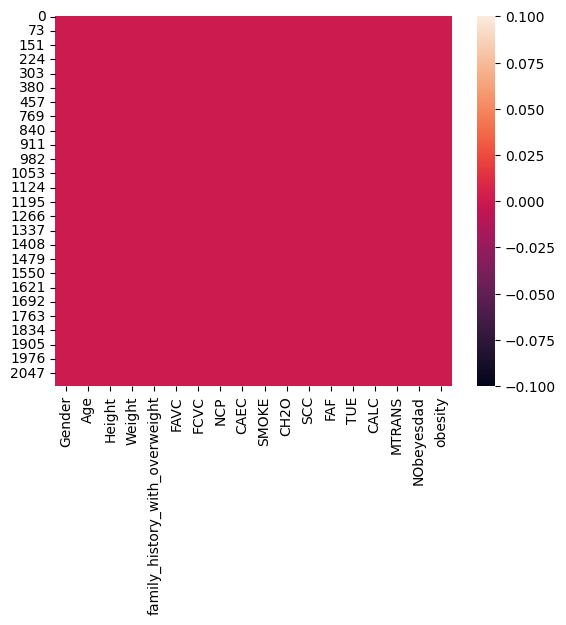

In [17]:
# Verificando valores nulos no dataset:

sns.heatmap(db.isnull());

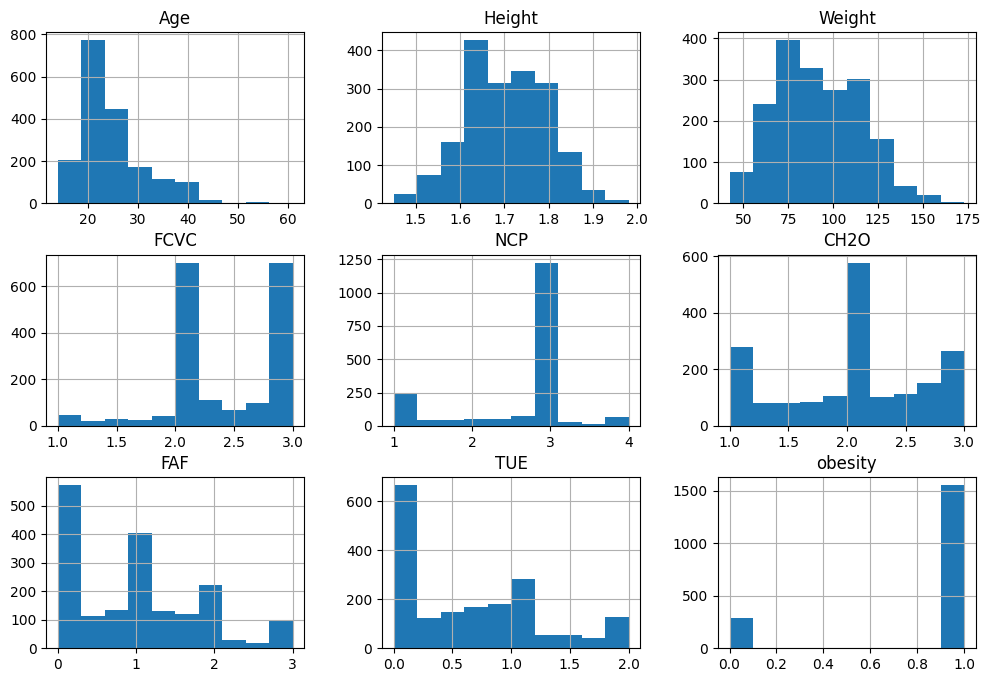

In [18]:
# Visualizado a distribuição de variáveis:

db.hist(figsize=(12,8))
plt.show()

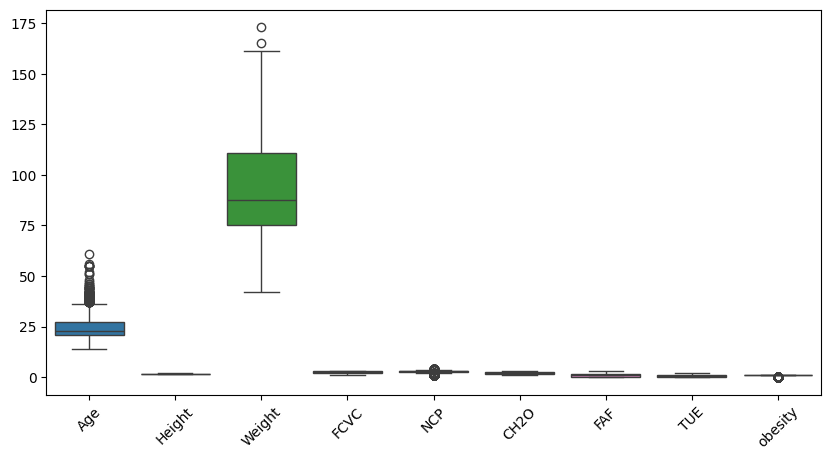

In [19]:
# Visualizando outliers:

plt.figure(figsize=(10, 5))
sns.boxplot(data=db.select_dtypes(include=np.number))
plt.xticks(rotation=45)
plt.show()


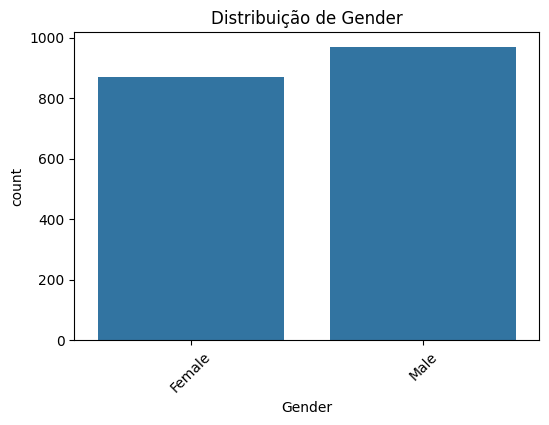

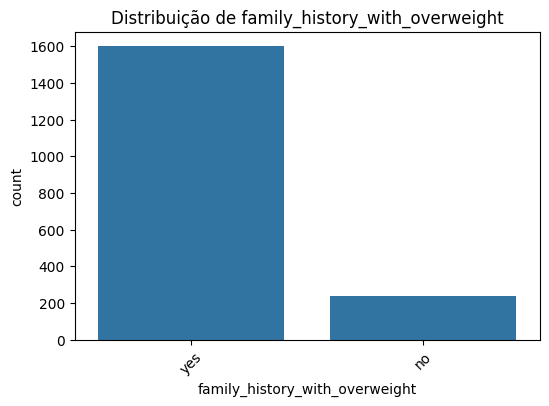

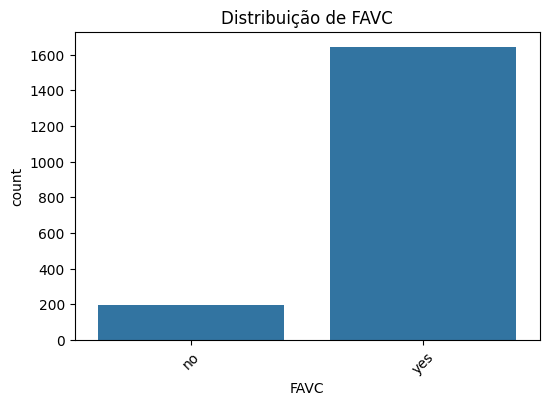

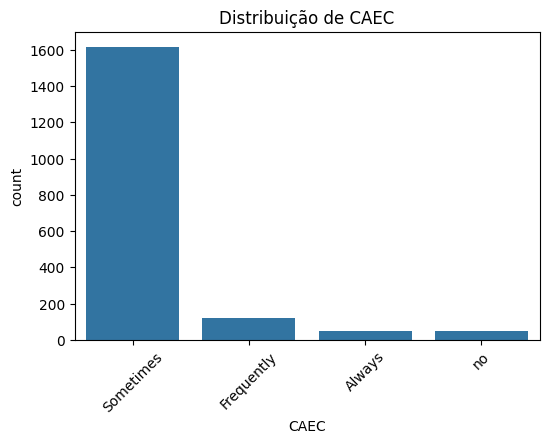

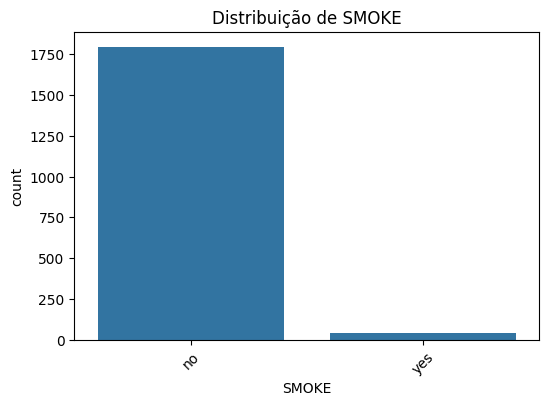

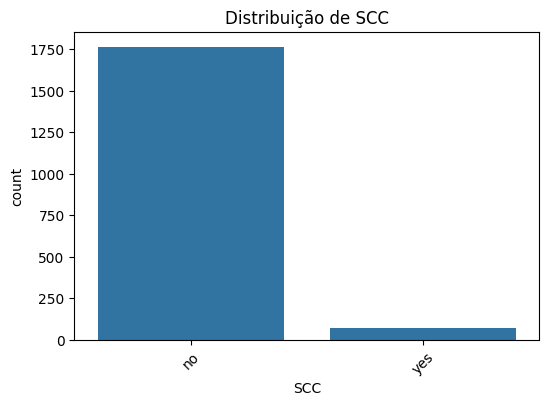

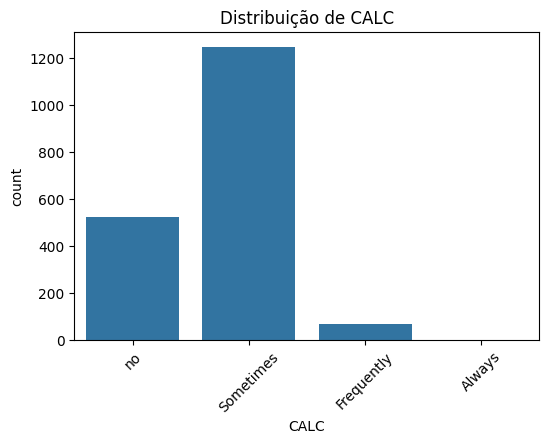

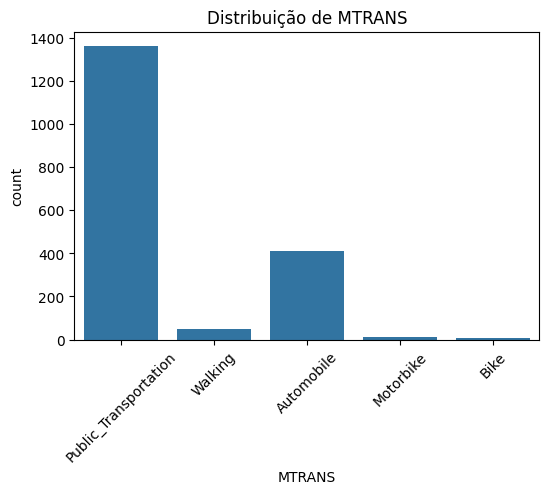

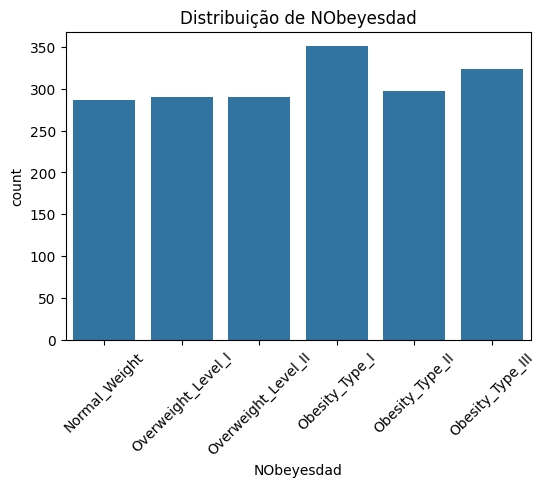

In [20]:
# Contagem de categorias (ex: sexo, nível de atividade física):

for col in db.select_dtypes(include="object").columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=db[col])
    plt.xticks(rotation=45)
    plt.title(f"Distribuição de {col}")
    plt.show()


In [21]:
caracteres_a_converter = db.iloc[:, [0, 4, 5, 8, 9, 11, 14, 15, 16]].values

In [22]:
caracteres_a_converter

array([['Female', 'yes', 'no', ..., 'no', 'Public_Transportation',
        'Normal_Weight'],
       ['Female', 'yes', 'no', ..., 'Sometimes', 'Public_Transportation',
        'Normal_Weight'],
       ['Male', 'yes', 'no', ..., 'Frequently', 'Public_Transportation',
        'Normal_Weight'],
       ...,
       ['Female', 'yes', 'yes', ..., 'Sometimes',
        'Public_Transportation', 'Obesity_Type_III'],
       ['Female', 'yes', 'yes', ..., 'Sometimes',
        'Public_Transportation', 'Obesity_Type_III'],
       ['Female', 'yes', 'yes', ..., 'Sometimes',
        'Public_Transportation', 'Obesity_Type_III']], dtype=object)

In [23]:
# Convertendo valores das colunas de caracteres para valores numéricos:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Lista das colunas categóricas que vamos transformar:
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                       'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Criando o OneHotEncoder e aplicando em todas as colunas de uma vez:
onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), categorical_columns)], remainder='drop')


# Transformando os valores:
encoded_data = onehotencoder.fit_transform(db)

# retornando os nomes das colunas geradas com o onehotencoder:
transformed_feature_names = onehotencoder.get_feature_names_out()

# criando um novo DataFrame com os valores:
encoded_df = pd.DataFrame(encoded_data, columns=transformed_feature_names)

In [24]:
# concatenando as colunas do antigo db com as transformadas, substituindo e dropando os valores (caracteres) da coluna antiga e adicionado os novos (numéricos):

db_encoded = pd.concat([db.drop(columns=categorical_columns), encoded_df], axis=1)


In [25]:
db_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,obesity,OneHot__Gender_Female,...,OneHot__MTRANS_Bike,OneHot__MTRANS_Motorbike,OneHot__MTRANS_Public_Transportation,OneHot__MTRANS_Walking,OneHot__NObeyesdad_Normal_Weight,OneHot__NObeyesdad_Obesity_Type_I,OneHot__NObeyesdad_Obesity_Type_II,OneHot__NObeyesdad_Obesity_Type_III,OneHot__NObeyesdad_Overweight_Level_I,OneHot__NObeyesdad_Overweight_Level_II
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


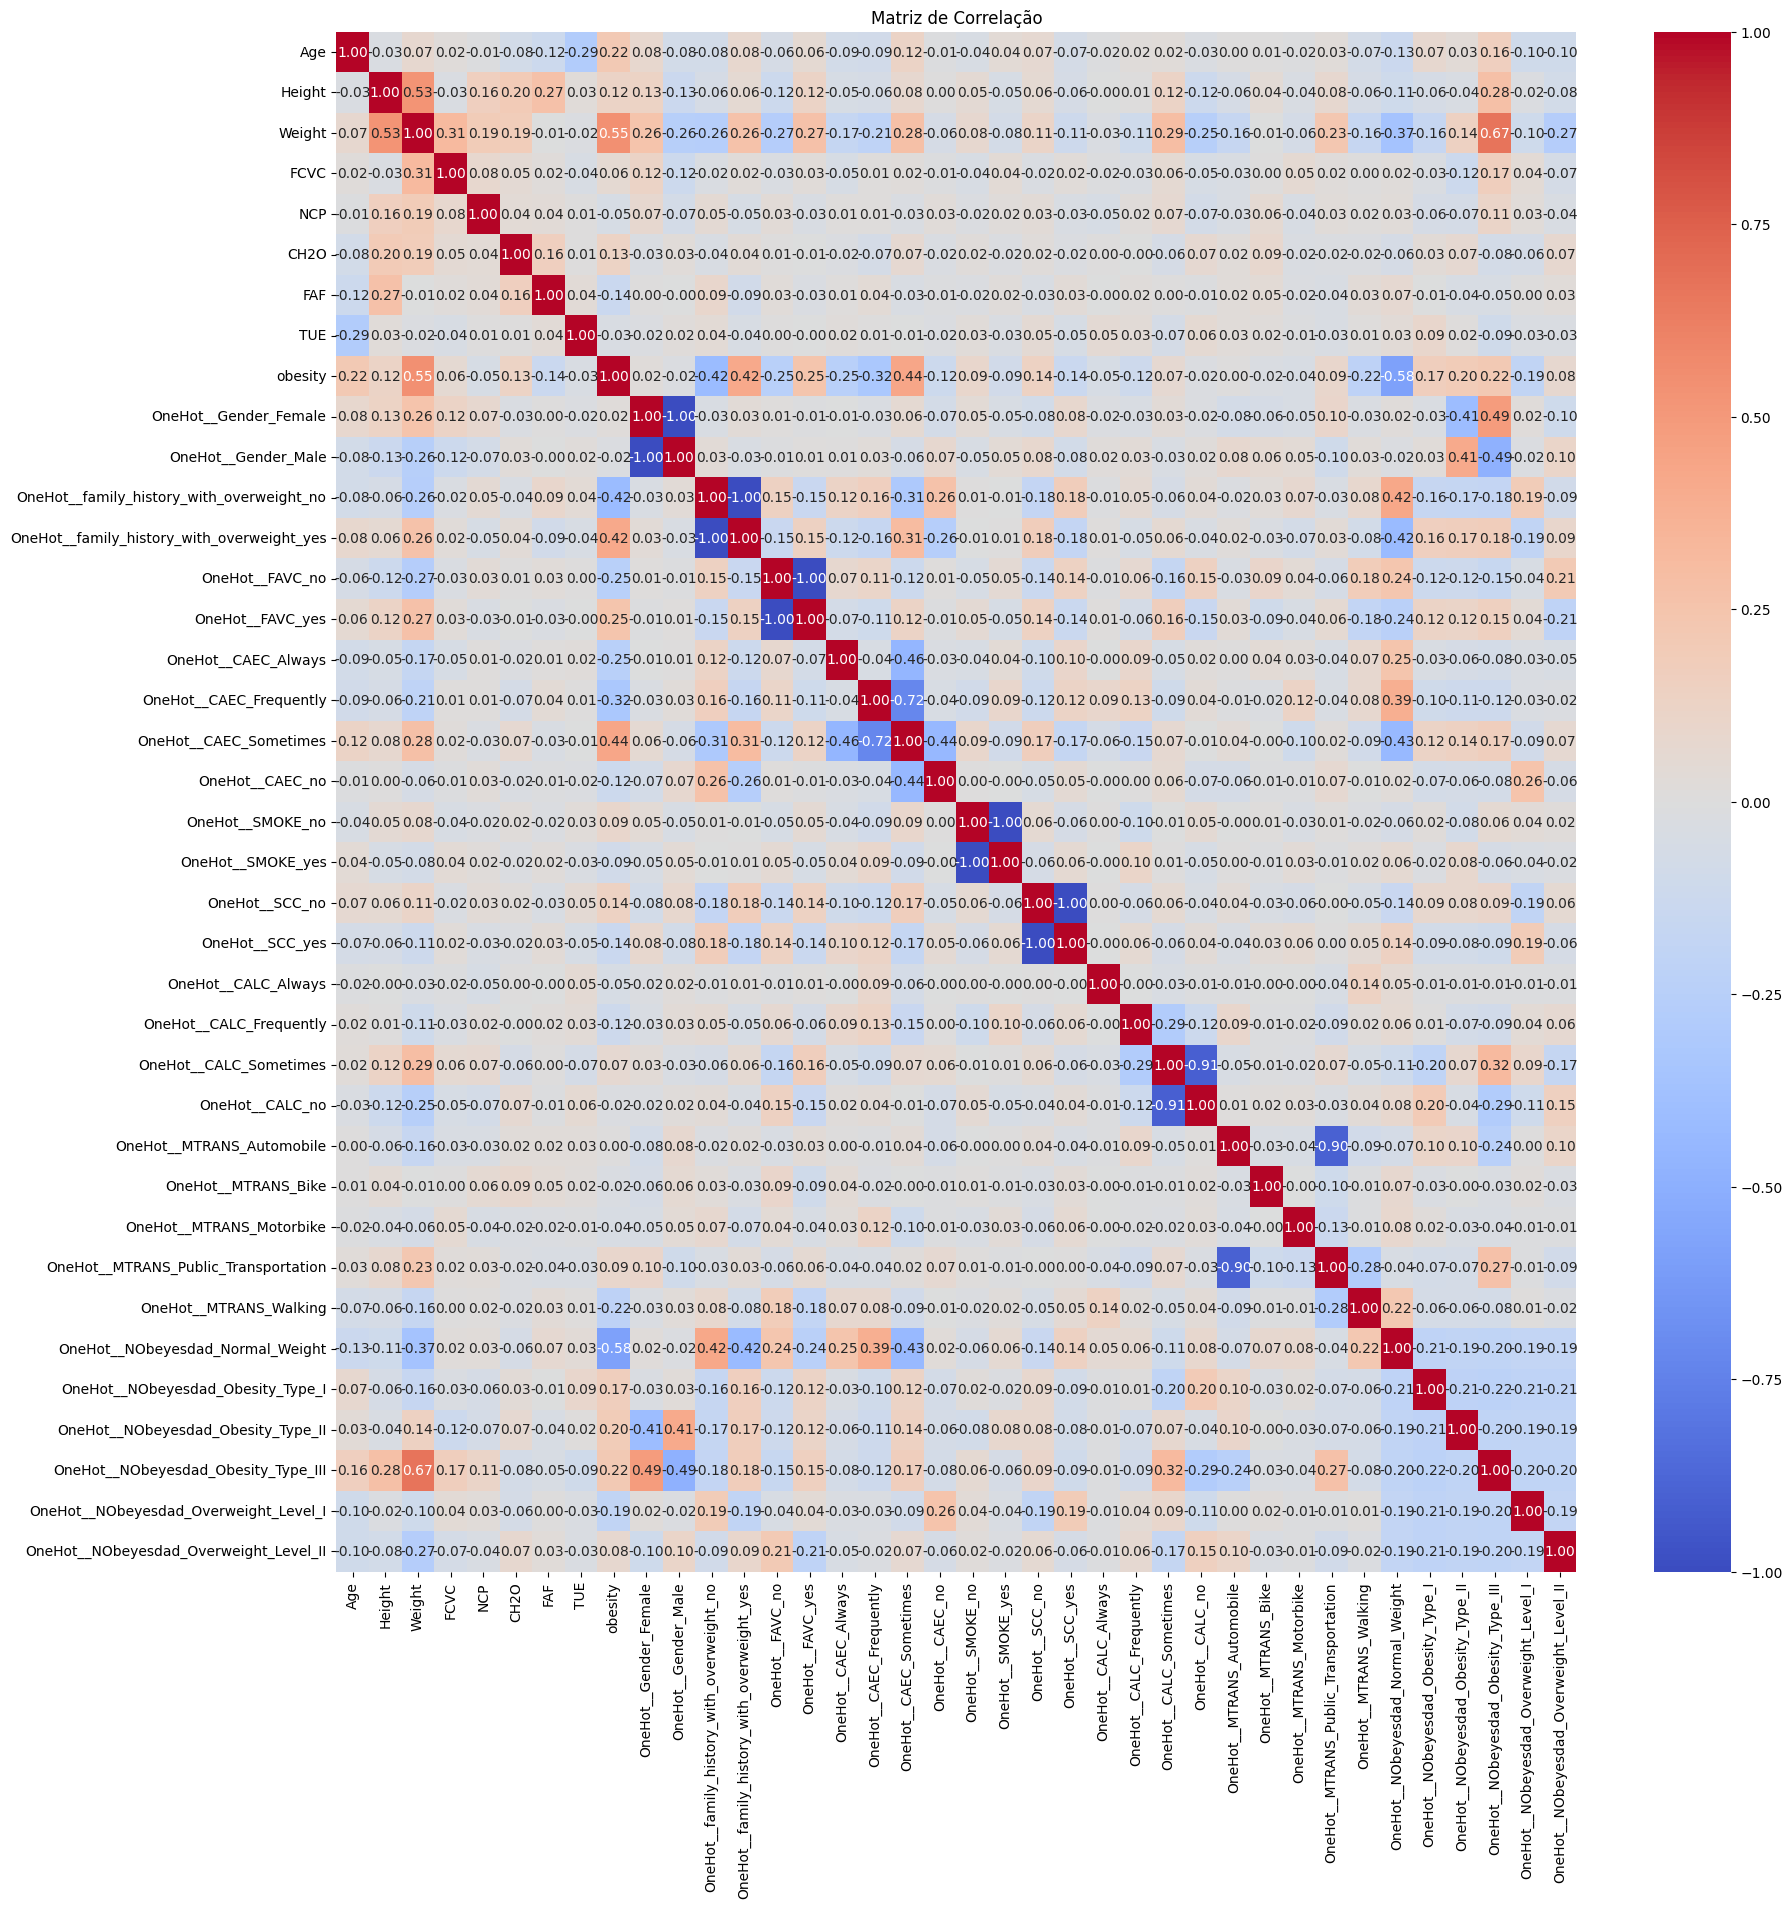

In [26]:
plt.figure(figsize=(20, 20))
sns.heatmap(db_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


In [27]:
# Criando a função de calculo de IMC e adicionando nova coluna 'IMC' ao dataframe:

def calcular_imc(altura, peso):
    imc = peso / (altura * altura)
    return round(imc, 2)


db_encoded['IMC'] = db_encoded.apply(lambda row: calcular_imc(row['Height'], row['Weight']), axis=1)

In [28]:
db_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,obesity,OneHot__Gender_Female,...,OneHot__MTRANS_Motorbike,OneHot__MTRANS_Public_Transportation,OneHot__MTRANS_Walking,OneHot__NObeyesdad_Normal_Weight,OneHot__NObeyesdad_Obesity_Type_I,OneHot__NObeyesdad_Obesity_Type_II,OneHot__NObeyesdad_Obesity_Type_III,OneHot__NObeyesdad_Overweight_Level_I,OneHot__NObeyesdad_Overweight_Level_II,IMC
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24.39
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24.24
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23.77
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26.85
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.34


In [29]:
# Criando a coluna 'Gender' baseada nas colunas one-hot:

db_encoded['Gender'] = db_encoded['OneHot__Gender_Female'].apply(lambda x: 'Female' if x == 1 else 'Male')


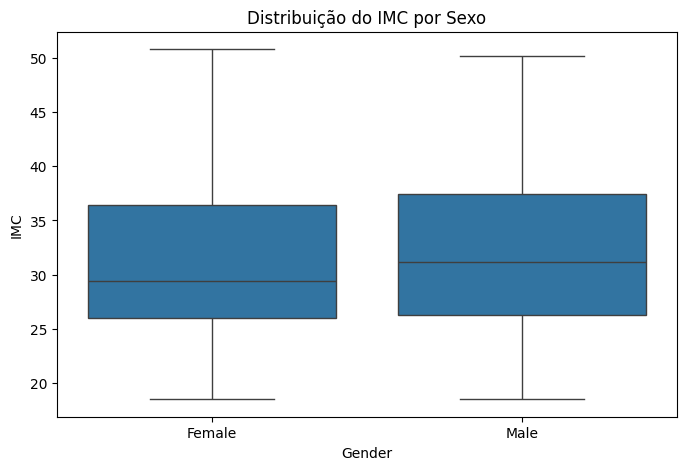

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=db_encoded['Gender'], y=db_encoded["IMC"])
plt.title("Distribuição do IMC por Sexo")
plt.show()

In [48]:
# Criando filtro para pacientes obesos por sexo:

pacientes_homens = db_encoded[(db_encoded['Gender'] == 'Male') & (db_encoded['obesity'] == 1)]
pacientes_mulheres = db_encoded[(db_encoded['Gender'] == 'Female') & (db_encoded['obesity'] == 1)]

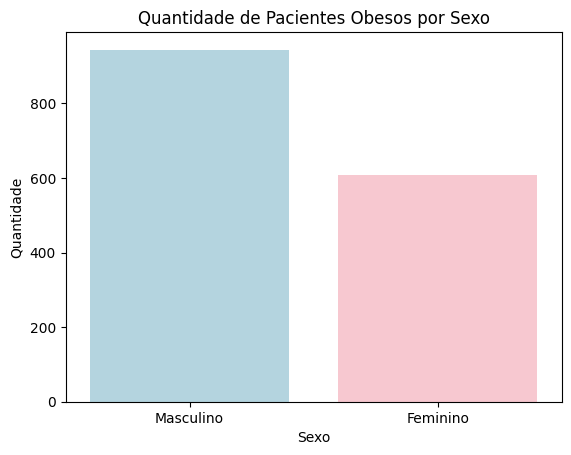

In [53]:
# Criando gráfico para visualizar pacientes obesos por sexo:

pacientes_por_sexo = pd.DataFrame({
    'Sexo' : ['Masculino', 'Feminino'],
    'Quantidade' : [pacientes_homens.shape[0], pacientes_mulheres.shape[0]]
})

sns.barplot( x='Sexo', y='Quantidade', data=pacientes_por_sexo, hue='Sexo', palette=['lightblue', 'pink'] )
plt.title('Quantidade de Pacientes Obesos por Sexo')
plt.show()

In [62]:
# Verificando se temos outliers na coluna 'IMC' usando o método do Intervalo Interquartil (IQR):

Q1 = db_encoded['IMC'].quantile(0.25)
Q3 = db_encoded['IMC'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = ((db_encoded['IMC'] < limite_inferior) | (db_encoded['IMC'] > limite_superior)).any()
print(f"Existem valores outliers na coluna 'IMC'? : {outliers}")

Existem valores outliers na coluna 'IMC'? : False


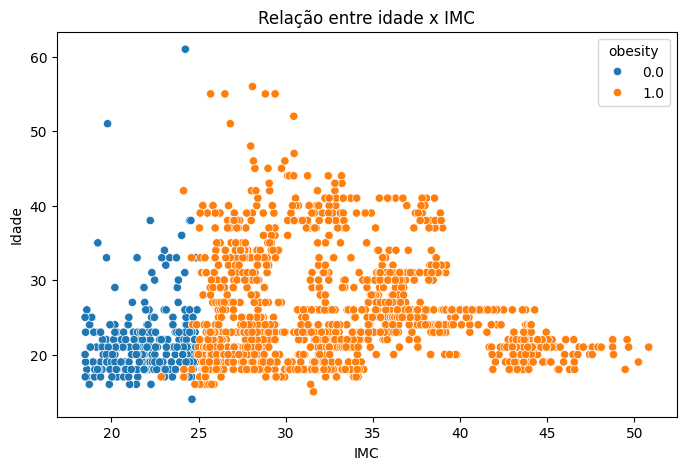

In [68]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = db_encoded['IMC'], y=db_encoded['Age'], hue = db_encoded['obesity'])
plt.title('Relação entre idade x IMC')
plt.xlabel('IMC')
plt.ylabel('Idade')
plt.show();

In [77]:
# Convertendo os dados da coluna 'FAF' para int para plotar os dados:

db_encoded['FAF'] = db_encoded['FAF'].fillna(0).astype(int)
db_encoded['FAF'] = db_encoded['FAF'].astype(int)

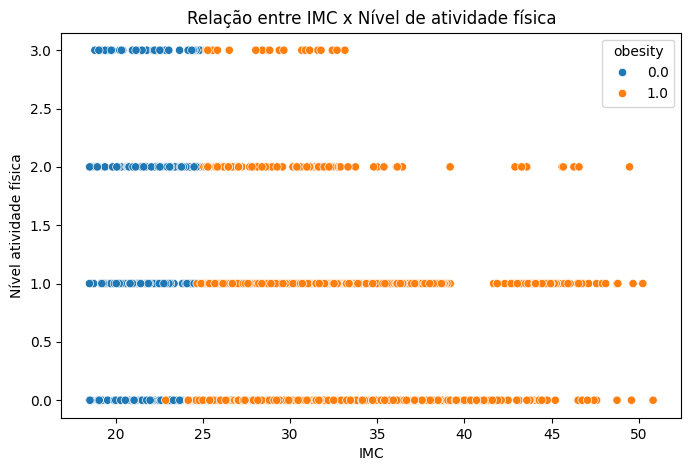

In [83]:
# Criando gráfico para visualizar relação entre o IMC e o nível de atividade física dos indivíduos:

plt.figure(figsize=(8,5))
sns.scatterplot(x = db_encoded['IMC'], y=db_encoded['FAF'], hue = db_encoded['obesity'])
plt.title('Relação entre IMC x Nível de atividade física')
plt.xlabel('IMC')
plt.ylabel('Nível atividade física')
plt.show();